In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving CO_Monthly.csv to CO_Monthly.csv


In [ ]:
df=pd.read_csv('CO_Monthly.csv')

In [ ]:
df.head()

,DATE,CO,Forecast
0,2019/1/1,0.037,NaN
1,2019/2/1,0.037,NaN
2,2019/3/1,0.039,NaN
3,2019/4/1,0.039,NaN
4,2019/5/1,0.038,NaN


In [ ]:
df.tail()

,DATE,CO,Forecast
30,2021/7/1,0.030,NaN
31,2021/8/1,0.032,NaN
32,2021/9/1,0.030,NaN
33,2021/10/1,0.033,NaN
34,2021/11/1,0.037,NaN


In [ ]:
## Cleaning up the data
df.columns=["DATE","CO","Forecast"]
df.head()

,DATE,CO,Forecast
0,2019/1/1,0.037,NaN
1,2019/2/1,0.037,NaN
2,2019/3/1,0.039,NaN
3,2019/4/1,0.039,NaN
4,2019/5/1,0.038,NaN


In [ ]:
df.tail()

,DATE,CO,Forecast
30,2021/7/1,0.030,NaN
31,2021/8/1,0.032,NaN
32,2021/9/1,0.030,NaN
33,2021/10/1,0.033,NaN
34,2021/11/1,0.037,NaN


In [ ]:
# Convert Month into Datetime
df['DATE']=pd.to_datetime(df['DATE'])

In [ ]:
df.head()

,DATE,CO,Forecast
0,2019-01-01,0.037,NaN
1,2019-02-01,0.037,NaN
2,2019-03-01,0.039,NaN
3,2019-04-01,0.039,NaN
4,2019-05-01,0.038,NaN


In [ ]:
df.set_index('DATE',inplace=True)

In [ ]:
df.head()

,CO,Forecast
DATE,,
2019-01-01,0.037,NaN
2019-02-01,0.037,NaN
2019-03-01,0.039,NaN
2019-04-01,0.039,NaN
2019-05-01,0.038,NaN


In [ ]:
df.describe()

,CO,Forecast
count,35.000000,0.0
mean,0.035343,NaN
std,0.004072,NaN
min,0.029000,NaN
25%,0.032000,NaN
50%,0.037000,NaN
75%,0.038500,NaN
max,0.043000,NaN


## Step 2: Visualize the Data

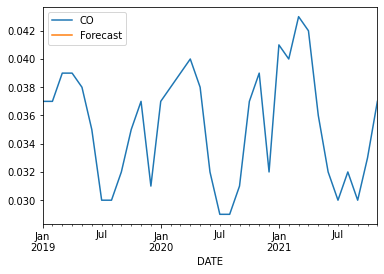

In [ ]:
df.plot()

In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df['CO'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(CO):
    result=adfuller(CO)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [ ]:
adfuller_test(df['CO'])

ADF Test Statistic : -4.43919692014423
p-value : 0.00025284542047458817
#Lags Used : 7
Number of Observations Used : 27
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Differencing

In [ ]:
df['precipitation First Difference'] = df['precipitation'] - df['precipitation'].shift(1)

In [ ]:
df['precipitation'].shift(1)

DATE
2005-01-01        NaN
2005-02-01     15.398
2005-03-01     16.271
2005-04-01     31.718
2005-05-01     61.118
               ...   
2019-08-01    249.918
2019-09-01    228.593
2019-10-01    259.176
2019-11-01    130.490
2019-12-01     26.309
Name: precipitation, Length: 180, dtype: float64

In [ ]:
df['Seasonal First Difference']=df['CO']-df['CO'].shift(12)

In [ ]:
df.head(14)

,CO,Forecast,Seasonal First Difference
DATE,,,
2019-01-01,0.037,NaN,NaN
2019-02-01,0.037,NaN,NaN
2019-03-01,0.039,NaN,NaN
2019-04-01,0.039,NaN,NaN
2019-05-01,0.038,NaN,NaN
2019-06-01,0.035,NaN,NaN
2019-07-01,0.030,NaN,NaN
2019-08-01,0.030,NaN,NaN
2019-09-01,0.032,NaN,NaN


In [ ]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.6086748979347547
p-value : 0.005597331678616175
#Lags Used : 8
Number of Observations Used : 14
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


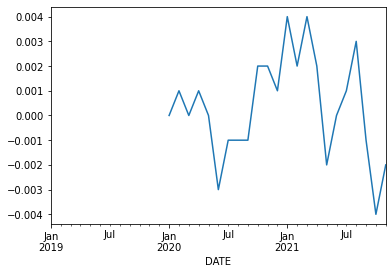

In [ ]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model
![image.png](attachment:image.png)

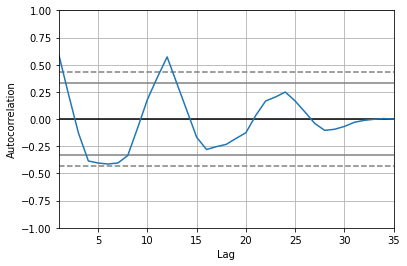

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['CO'])
plt.show()